# Implementação do Algoritmo Backpropagation

A ideia do algoritmo backpropagation é, com base no cálculo do erro ocorrido na camada de saída da rede neural, recalcular o valor dos pesos do vetor w da camada última camada de neurônios e assim proceder para as camadas anteriores, de trás para a frente (fase *backward*), ou seja, atualizar todos os pesos w das camadas a partir da última até atingir a camada de entrada da rede, para isso realizando a retropropagação o erro obtido pela rede. 

A imagem a seguir mostra a nossa rede, com as unidades de entrada marcadas como Input1, Input2 e Input3 (**Input Layer**) conectadas com os *nós* da camada oculta (**Hidden Layer**). Por sua vez as saída dos *nós* da camada oculda servem como entrada para os *nós*  da camada de saída (**Output Layer**). <img src='MPL_back.png' /><br>

O DataSet utilizado para o treinamento da MPL 3x4x2 é o **"Data.csv"**, o qual possui informações dispostas em colunas:

* **Input1**:  Entrada 1 da MPL.
* **Input2**:  Entrada 2 da MPL.
* **Input3**:  Entrada 3 da MPL.
* **Output1**:  Saída 1 da MPL.
* **Output2**:  Saída 2 da MPL.


### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Função do cáculo da sigmóide
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Carregando os dados

Para que uma rede dessas funcione, é preciso treiná-la. O treinamento de uma rede MLP insere-se no contexto de aprendizado de máquina supervisionado, em que cada amostra de dados utilizada apresenta um rótulo informando a que classificação ela se encaixa. Assim, utilizaremos um arquivo Data.csv como dataset para treinamento da nossa MPL.

Vamos começar lendo o arquivo Data.csv em um dataframe do pandas.

In [2]:
DataSet = pd.read_csv('Data.csv')

In [3]:
DataSet.head()

19:39:41  5  9  13  18  22  26  29  31  31.1  ...  14.5  14.6  14.7  14.8  \
0  19:39:49  5  7  10  12  14  15  16  16    16  ...  22.0  25.0  27.0  28.0   
1  19:46:18  5  8  10  12  14  17  19  20    22  ...   NaN   NaN   NaN   NaN   
2  19:46:32  5  7  10  12  15  17  19  21    23  ...  68.0  53.0  41.0  32.0   

   13.1  13.2    11    10    8  5.1  
0  26.0  22.0  17.0  12.0  6.0  NaN  
1   NaN   NaN   NaN   NaN  NaN  NaN  
2  26.0  21.0  17.0  13.0  NaN  NaN  

[3 rows x 79 columns]

### Váriaveis do *Dataset*

In [4]:
DataSet.columns

Index(['19:39:41', '5', '9', '13', '18', '22', '26', '29', '31', '31.1', '30',
       '28', '25', '23', '20', '19', '17', '17.1', '16', '16.1', '16.2',
       '16.3', '16.4', '16.5', '16.6', '16.7', '16.8', '16.9', '16.10',
       '16.11', '16.12', '16.13', '16.14', '16.15', '16.16', '16.17', '16.18',
       '16.19', '16.20', '16.21', '16.22', '16.23', '16.24', '16.25', '16.26',
       '16.27', '16.28', '16.29', '16.30', '16.31', '16.32', '16.33', '15',
       '15.1', '15.2', '15.3', '15.4', '15.5', '15.6', '15.7', '15.8', '15.9',
       '15.10', '15.11', '14', '14.1', '14.2', '14.3', '14.4', '14.5', '14.6',
       '14.7', '14.8', '13.1', '13.2', '11', '10', '8', '5.1'],
      dtype='object')

## Separando os dados de treinamento e de validação

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos treinar o modelo no conjunto de treinamento, em seguida, usar o conjunto de teste para validar o modelo.

Em nosso exemplo iremos separar de forma randômica 33% dos dados para validação. Estes dados não serão utilizados para determinação dos coeficientes preditores do modelo. 


In [5]:
from sklearn.model_selection import train_test_split

In [60]:
X = DataSet.drop(['13', '14'], axis = 1)
y = DataSet.drop(['15', '16'], axis = 1)
print(X)
print(y)

   19:39:41  5  9  18  22  26  29  31  31.1  30  ...  14.5  14.6  14.7  14.8  \
0  19:39:49  5  7  12  14  15  16  16    16  16  ...  22.0  25.0  27.0  28.0   
1  19:46:18  5  8  12  14  17  19  20    22  24  ...   NaN   NaN   NaN   NaN   
2  19:46:32  5  7  12  15  17  19  21    23  24  ...  68.0  53.0  41.0  32.0   

   13.1  13.2    11    10    8  5.1  
0  26.0  22.0  17.0  12.0  6.0  NaN  
1   NaN   NaN   NaN   NaN  NaN  NaN  
2  26.0  21.0  17.0  13.0  NaN  NaN  

[3 rows x 77 columns]
   19:39:41  5  9  13  18  22  26  29  31  31.1  ...  14.5  14.6  14.7  14.8  \
0  19:39:49  5  7  10  12  14  15  16  16    16  ...  22.0  25.0  27.0  28.0   
1  19:46:18  5  8  10  12  14  17  19  20    22  ...   NaN   NaN   NaN   NaN   
2  19:46:32  5  7  10  12  15  17  19  21    23  ...  68.0  53.0  41.0  32.0   

   13.1  13.2    11    10    8  5.1  
0  26.0  22.0  17.0  12.0  6.0  NaN  
1   NaN   NaN   NaN   NaN  NaN  NaN  
2  26.0  21.0  17.0  13.0  NaN  NaN  

[3 rows x 77 columns]


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

## Configuração da MPL

In [62]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 3
N_hidden = 4
N_output = 2
learnrate = 0.5

## Inicialização dos pesos da MPL (Aleatório)

In [63]:
#Pesos da Camada Oculta (Inicialização Aleatória)
weights_input_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
print('Pesos da Camada Oculta:')
print(weights_input_hidden)

#Pesos da Camada de Saída (Inicialização Aleatória)
weights_hidden_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))
print('Pesos da Camada de Saída:')
print(weights_hidden_output)

Pesos da Camada Oculta:
[[ 0.01870266 -0.12122817 -0.06620811  0.09219134]
 [ 0.10622438 -0.01410208 -0.0779305   0.01542405]
 [-0.01361192  0.00659729 -0.12642775 -0.04060911]]
Pesos da Camada de Saída:
[[ 0.20055113  0.06544543]
 [-0.10170491  0.1218326 ]
 [-0.01759003 -0.1055246 ]
 [ 0.06506466  0.04317726]]


## Algoritmo Backpropagation



In [69]:
epochs = 5000
last_loss=None
EvolucaoError=[]
IndiceError=[]

for e in range(epochs):
    delta_w_i_h = np.zeros(weights_input_hidden.shape)
    delta_w_h_o = np.zeros(weights_hidden_output.shape)
    for xi, yi in zip(X_train.values, y_train.values):
        
# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden.T)
        
         #hidden_inputs = np.dot(inputs, self.weights_input_to_hidden.T)
        
        
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        #print('As saídas da rede são',output)
#-------------------------------------------    
    
# Backward Pass
        ## TODO: Cálculo do Erro
        error = yi - output
    
        # TODO: Calcule o termo de erro de saída (Gradiente da Camada de Saída)
        output_error_term = error * output * (1 - output)

        # TODO: Calcule a contribuição da camada oculta para o erro
        hidden_error = np.dot(weights_hidden_output,output_error_term)
    
        # TODO: Calcule o termo de erro da camada oculta (Gradiente da Camada Oculta)
        hidden_error_term = hidden_error * hidden_layer_output * (1 - hidden_layer_output)
    
        # TODO: Calcule a variação do peso da camada de saída
        delta_w_h_o += output_error_term*hidden_layer_output[:, None]

        # TODO: Calcule a variação do peso da camada oculta
        delta_w_i_h += hidden_error_term * xi[:, None]
        
    #Atualização dos pesos na época em questão
    weights_input_hidden += learnrate * delta_w_i_h / n_records
    weights_hidden_output += learnrate * delta_w_h_o / n_records
    
    
    # Imprimir o erro quadrático médio no conjunto de treinamento
    
    if  e % (epochs / 20) == 0:
        hidden_output = sigmoid(np.dot(xi, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - yi) ** 2)

        if last_loss and last_loss < loss:
            print("Erro quadrático no treinamento: ", loss, " Atenção: O erro está aumentando")
        else:
            print("Erro quadrático no treinamento: ", loss)
        last_loss = loss
         
        EvolucaoError.append(loss)
        IndiceError.append(e)

ValueError: shapes (77,) and (4,3) not aligned: 77 (dim 0) != 4 (dim 0)

### Gráfico da Evolução do Erro

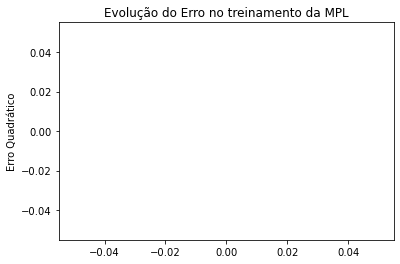

In [65]:
plt.plot(IndiceError, EvolucaoError, 'r') # 'r' is the color red
plt.xlabel('')
plt.ylabel('Erro Quadrático')
plt.title('Evolução do Erro no treinamento da MPL')
plt.show()


## Validação do modelo

In [66]:
# Calcule a precisão dos dados de teste
n_records, n_features = X_test.shape
MSE_Output1=0
MSE_Output2=0

for xi, yi in zip(X_test.values, y_test.values):

# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        
#-------------------------------------------    
    
#Cálculo do Erro
        ## TODO: Cálculo do Erro
        error = yi - output
        MSE_Output1 += (yi[0] - output[0])**2
        MSE_Output2 += (yi[1] - output[1])**2
          
#Erro Quadrático Médio 
MSE_Output1/=n_records 
MSE_Output2/=n_records  

print('Erro Quadrático Médio da Saída Output1 é: ',MSE_Output1)
print('Erro Quadrático Médio da Saída Output2 é: ',MSE_Output2)

ValueError: shapes (77,) and (3,4) not aligned: 77 (dim 0) != 3 (dim 0)

## Métricas de Avaliação

Aqui estão três métricas comuns de avaliação para problemas de regressão:


- **Erro Médio Absoluto** (MAE): é a média do valor absoluto dos erros.

- **Erro Quadrático Médio** (MSE): é a média do quadrado dos erros.

- **Raiz do Erro Médio Quadrático** (RMSE): é a raiz da média do quadrado dos erro.


O objetivo é sempre minimizar estas funções de Erro.